# Introduction
t-SNE, which stands for t-distributed Stochastic Neighbor Embedding, is a dimensionality reduction used for visualizing high-dimensional data. Unlike PCA that focuses on preserving variance, t-SNE aims to capture the similarities between the data points in a high dimensional space and represent them accurately in a lower dimensional space, typically, 2D or 3D, suitable for visualization.

### Strengths
- Preserves local similarities: t-SNE excels at preserving the similarities between nearby data points in the high-dimensional space. This allows for visualization of complex, non-linear relationships between data points that might not be captured by PCA.
- Effective for non-linear data: While PCA works well for linear relationships, t-SNE is particularly useful for data with non-linear structures. This makes it valuable for tasks like visualizing high-dimensional datasets with intricate patterns.

### Considerations
- Computational cost: Compared to PCA, t-SNE can be computationally expensive, especially for large datasets. It might take longer to compute the lower-dimensional representation.
- Stochasticity: t-SNE incorporates randomness in its calculations. This means repeated runs with the same data might produce slightly different visualizations.

### When to use t-SNE?
- When the data is high-dimensional with non-linear relationships and there is a need to visualize the underlying structure.
- When exploring datasets to identify potential clusters or groupings of data points.
- When interpreting the results of complex machine learning models by visualizing their embeddings in a lower-dimensional space.

### PCA v. t-SNE
- PCA is a powerful tool for dimensionality reduction that prioritizes preserving variance in the transformed data.
- t-SNE complements PCA by focusing on maintaining the similarities between data points, making it particularly suitable for visualizing non-linear relationships in high-dimensional data.

# Steps to Apply t-SNE
1. Data preparation:
    - Import libraries: Start by importing the necessary libraries like `numpy`, `pandas`, etc.
    - Load data: Load the high-dimensional data into a suitable data structure (array or DataFrame).
2. Preprocessing: Consider standardizing the data (centering and scaling features) to ensure all features contribute equally to the distance calculations used by t-SNE. This can improve the quality of the visualization. Libraries like `sklearn.preprocessing.StandardScaler` can be used for this purpose.
3. t-SNE model definition:
    - Import t-SNE: Import the TSNE from a library like `scikit-learn.manifold`.
    - Define parameters: The various parameter for the t-SNE model can be defined,
        - `n_components`: The desired number of dimensions for the lower-dimensional representation (typically 2 or 3 for visualization).
        - `perplexity`: A hyperparameter that controls the number of neighbors considered similar for each data point. This influences the local structure preservation in the visualization. Experimenting with different perplexity values might be needed to find an optimal setting.
        - `learning_rate`: A hyperparameter that controls the learning rate of the t-SNE algorithm. Adjusting this can impact the convergence speed and the final embedding.
4. Model fitting and transformation:
    - Model fitting: Create a TSNE object with the desired parameters.
    - Data Transformation: Use the fit_transform method on the t-SNE object to fit the model to the data and obtain the lower-dimensional representation. This gives the data points projected onto the chosen number of dimensions (e.g., 2D or 3D coordinates).
5.  Visualization:
    - Choose visualization library: Select a suitable library like Matplotlib or seaborn to create a scatter plot of the transformed data points in the lower-dimensional space.
    - Labeling and interpretation: Optionally, add labels or color-code the data points based on target variables or other relevant information for easier interpretation of the visualized clusters or structures.

### Additional considerations
- Computational cost: Be aware that t-SNE can be computationally expensive, especially for large datasets. The training time might be longer compared to PCA.
- Stochasticity: t-SNE incorporates randomness in its calculations. This means repeated runs with the same data might produce slightly different visualizations. Consider averaging multiple runs for a more stable representation.
- Hyperparameter tuning: Experimenting with different perplexity and learning rate values can significantly impact the quality of the visualization. Techniques like grid search can be used to find optimal hyperparameter settings.

# Implementing t-SNE

In [1]:
# importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
# configuring the notebook
pd.set_option("display.max_columns", None)
sns.set_theme(style = "whitegrid")
warnings.filterwarnings("ignore")

In [3]:
# importing the data
df = pd.read_csv("data.csv")
df.head()

,f1,f2
0,2.038772,1.102760
1,0.869536,0.238030
2,1.795888,1.020364
3,0.103510,-0.513661
4,1.479554,0.750702


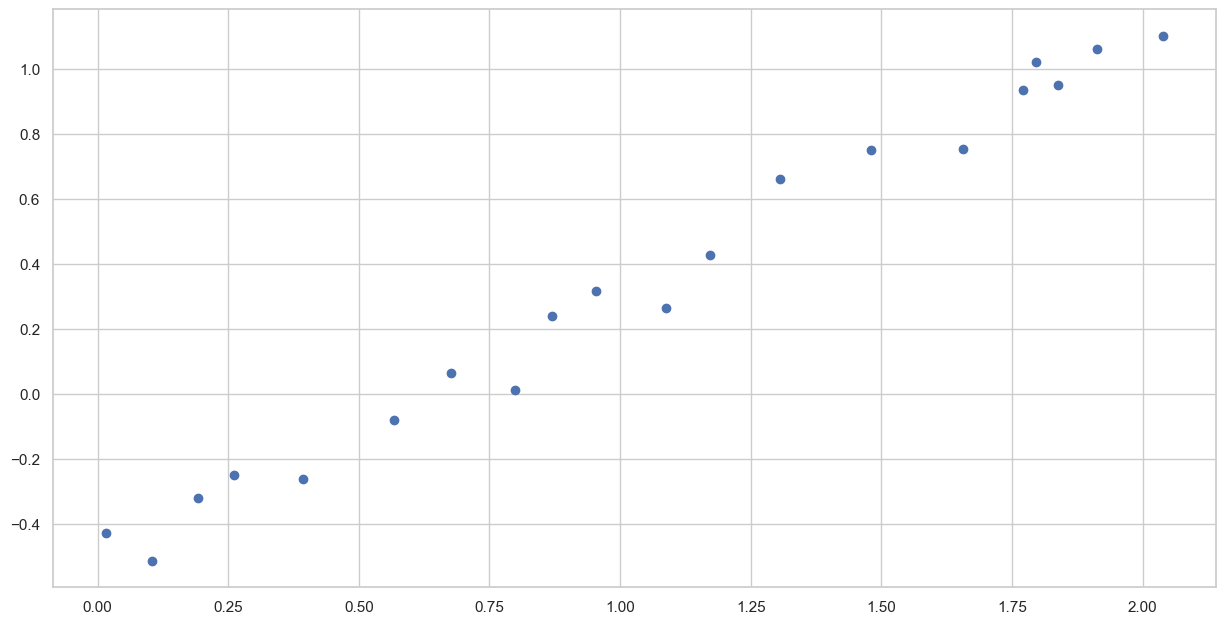

In [4]:
# visualizing the data
plt.figure(figsize = (15, 7.5))
plt.scatter(df["f1"], df["f2"])
plt.show()

In [5]:
# data standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df = scaler.fit_transform(df)
df

array([[ 1.54535131,  1.45245914],
       [-0.27203872, -0.18355391],
       [ 1.16782713,  1.29657192],
       [-1.46270299, -1.60570434],
       [ 0.6761373 ,  0.78638828],
       [ 1.34947087,  1.37420876],
       [-1.32351276, -1.24217262],
       [ 1.12913003,  1.13352252],
       [ 0.95000678,  0.7936775 ],
       [-0.57106382, -0.51601814],
       [ 0.06851605, -0.13256012],
       [ 0.19697379,  0.17359728],
       [ 0.40492253,  0.61580503],
       [-0.74142803, -0.78689518],
       [-0.14160441, -0.03396865],
       [-1.01204978, -1.12815545],
       [-1.59801963, -1.44282205],
       [ 1.23234064,  1.16652774],
       [-1.21750246, -1.10850974],
       [-0.38075383, -0.61239797]])

In [8]:
# transforming using t-SNE
from sklearn.manifold import TSNE

model = TSNE(n_components = 2, perplexity = 10)
df_transformed = model.fit_transform(df)
df_transformed

array([[ 21.073742 , -22.791014 ],
       [  4.026875 ,  -1.3710104],
       [ 19.376602 , -17.338017 ],
       [ -8.119024 ,  12.003372 ],
       [ 13.760291 , -14.585069 ],
       [ 16.753504 , -26.08338  ],
       [  1.2839665,  13.275243 ],
       [ 11.538726 , -24.126749 ],
       [ 10.499265 , -18.930763 ],
       [ -0.5183843,   1.4023916],
       [  8.920083 ,  -2.9413326],
       [  8.526721 ,  -8.165051 ],
       [  8.467183 , -13.652302 ],
       [  0.9488373,   6.591073 ],
       [  3.210324 ,  -6.1146884],
       [ -5.398897 ,   6.109659 ],
       [ -4.014825 ,  15.869114 ],
       [ 15.6701145, -20.744383 ],
       [ -2.8714595,  10.4371805],
       [  5.324605 ,   3.7508776]], dtype=float32)

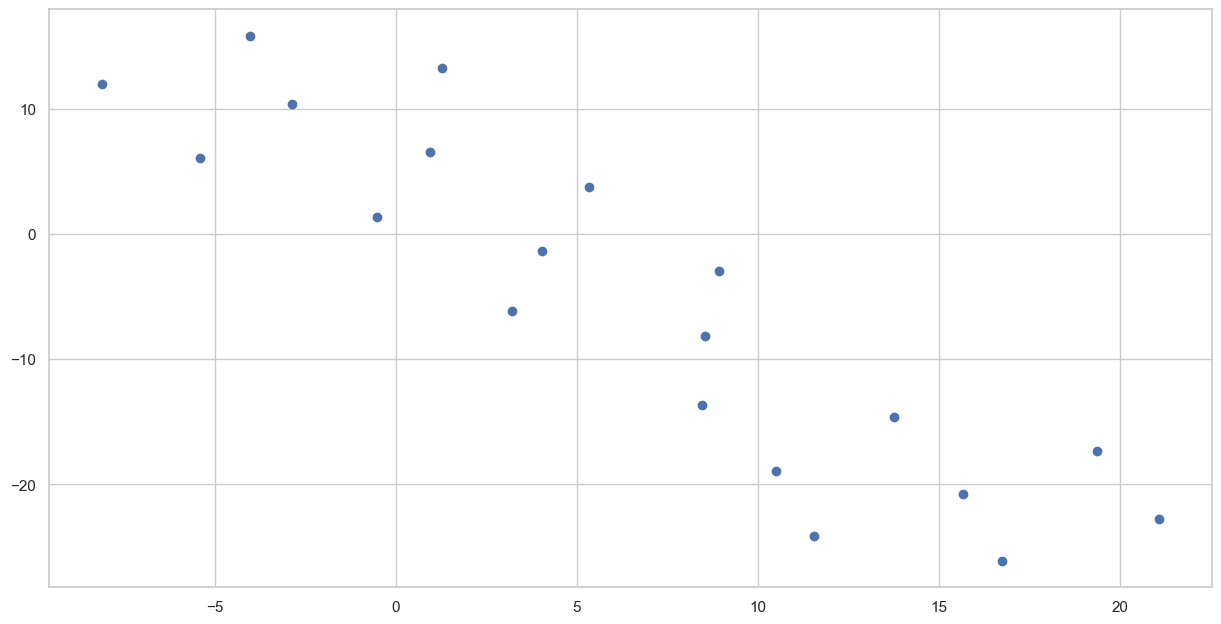

In [9]:
# visualize
plt.figure(figsize = (15, 7.5))
plt.scatter(df_transformed[:, 0], df_transformed[:, 1])
plt.show()

# Interpreting the Results from t-SNE
Interpreting t-SNE results requires a bit more caution compared to techniques like PCA due to its stochastic nature and focus on local similarities.

### Visual Patterns and Clusters
- Look for clusters or groupings of data points in the lower-dimensional representation (usually 2D or 3D). These clusters might indicate underlying structures or similarities within your data.
- Pay attention to how close data points are located in the t-SNE space. Points closer together are likely more similar based on the t-SNE's preservation of local neighborhoods in the high-dimensional space.

### Relating t-SNE Results to Original Data
- It's important to avoid over-interpreting the exact distances or positions of data points in the t-SNE visualization. These don't necessarily correspond to actual distances in the original high-dimensional space.
- Focus on the relative positioning of data points to identify potential clusters and relationships. Consider using color-coding or labeling the data points based on target variables or other relevant information to see if these groupings align with any meaningful categories in your data.

### Complementary Techniques
- To gain a deeper understanding of the data structure, consider using other dimensionality reduction techniques like PCA alongside t-SNE. PCA can reveal the directions of greatest variance, which might provide additional insights into the underlying factors driving the clusters observed in the t-SNE visualization.
- Clustering algorithms like k-means can be used on the t-SNE transformed data to formally partition the data into clusters based on their proximity in the lower-dimensional space.

### Limitations to Consider
- t-SNE visualizations are not guaranteed to be globally optimal representations of the high-dimensional data. Different runs with the same data might produce slightly different visualizations due to the stochasticity involved.
- Interpreting t-SNE results can be subjective and may require domain knowledge to connect the observed patterns to the real-world meaning of your data.

### Additional Tips
- Experiment with different perplexity values in the t-SNE model. This hyperparameter influences the balance between local and global structure preservation, potentially leading to different visualization outcomes.
- Visualize the data points with different colors based on target variables or other relevant information to see if the clusters in the t-SNE plot align with meaningful categories.